# Predicting Used Car's Auction Price

Here, Iam going to do an Exploratory Data Analysis (EDA) on the used car's auction dataset. Here I will check, what type of cars are auctioned and what are the factors that determine the auction of the used cars.


Here I'm importing the required Libraries for the EDA.

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt             #visualisation
import seaborn as sns                       #visualisation

%matplotlib inline


Loading the Dataset to Jupyter.
And displaying First 5 rows.

In [2]:
# Loading the Data into the Data Frame
df = pd.read_csv(r"C:\Users\Lalkumar\Desktop\car_prices.csv")

# To display the top 5 rows
df.head(5)

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8,13,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),NaN
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),NaN
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),NaN
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),NaN


Displaying the Last 5 rows
There are 558k rows and 16 columns

In [3]:
# To display the botton 5 rows
df.tail(3)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,Unnamed: 16
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),NaN
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),NaN
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,3.4,15008.0,gray,gray,"ford motor credit company,llc pd",29600,26700,Thu May 28 2015 05:30:00 GMT-0700 (PDT),NaN


In [4]:
# To check the types of data
df.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
Unnamed: 16      object
dtype: object

Here I'm going to delete some rows which are irrelavent to the data.

In [5]:
# To drop the irrelevant columns

df = df.drop(['vin', 'mmr', 'Unnamed: 16'], axis=1)
df.head(5)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Here I'm renaming the columns for the ease of using the data. And displaying the new column names.

In [6]:
# To  Rename the columns

df = df.rename(columns={"year": "Year", "make": "Brand","model":"Model","trim": "Version", "transmission": "Transmission", "body": "Type","state": "Place",
                        "condition": "Condition", "odometer": "Odometer","color":"Colour","interior":"Interior","seller":"Seller",
                       "sellingprice":"Price","saledate":"SaleDate"})
df.head(5)

,Year,Brand,Model,Version,Type,Transmission,Place,Condition,Odometer,Colour,Interior,Seller,Price,SaleDate
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


Sometimes Data may have duplicate Rows. Here I checked the number of Duplicate rows, but there was no duplicate rows.

In [7]:
# To find the number of duplicate rows

duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 14)


This data contains more null values. I'm displaying the null values in the dataset.

In [8]:
#  To Drop the missing or null values
print(df.isnull().sum())     # Finding the number of Null values

Year                0
Brand           10301
Model           10399
Version         10651
Type            13195
Transmission    65353
Place               0
Condition       11794
Odometer           94
Colour            749
Interior          749
Seller              0
Price               0
SaleDate            0
dtype: int64


Here I'm dropping/deleting the null values. Since this is a very large dataset deleting some will not affect the whole data.

In [9]:
df = df.dropna()    # Dropping the missing values.
df.count()

Year            472362
Brand           472362
Model           472362
Version         472362
Type            472362
Transmission    472362
Place           472362
Condition       472362
Odometer        472362
Colour          472362
Interior        472362
Seller          472362
Price           472362
SaleDate        472362
dtype: int64

In [10]:
print(df.isnull().sum())   # After dropping the values

Year            0
Brand           0
Model           0
Version         0
Type            0
Transmission    0
Place           0
Condition       0
Odometer        0
Colour          0
Interior        0
Seller          0
Price           0
SaleDate        0
dtype: int64


Finding the outliers in the data.
Here I plotted the outliers in Ododmeter and Price. Since the outliers of odometer and price show some influence in the data, I'm not deleting the outliers. Because the price of a vehicle and distance travelled will depends on many other factors.

<AxesSubplot:xlabel='Odometer'>

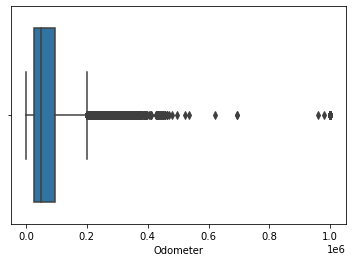

In [11]:
sns.boxplot(x=df['Odometer'])

<AxesSubplot:xlabel='Price'>

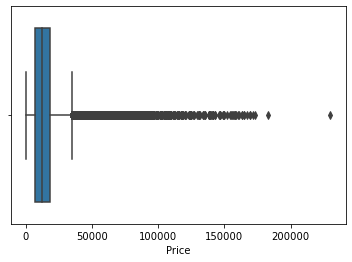

In [12]:
sns.boxplot(x=df['Price'])

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year            5.0
Odometer    68454.0
Price       11000.0
dtype: float64


Plotted a graph of Number of vehicles vs Brands to identify the top brands in the auction. And Ford was most. 

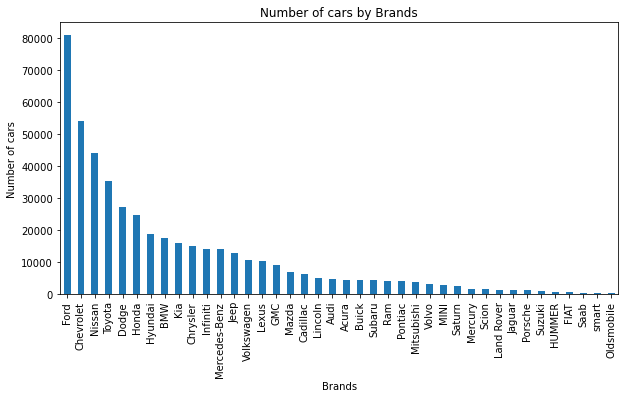

In [14]:
df.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Brands")
plt.ylabel('Number of cars')
plt.xlabel('Brands');

# Finding Insights

Here I plotted a graph showing the number of vehicles sold according to their price.
Most of the vehicles sold in a range of 10k to 20k.

Text(0, 0.5, 'Freq')

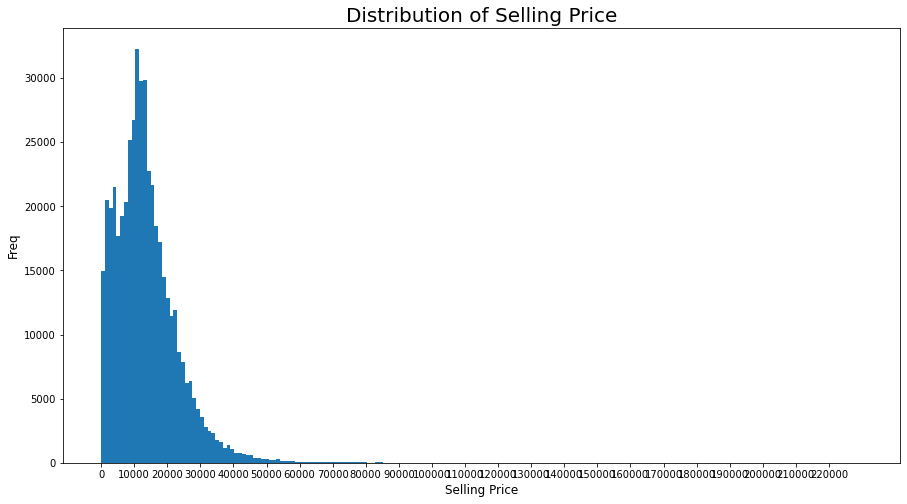

In [15]:
plt.figure(figsize=(15,8))
plt.hist(df['Price'],bins=200)
plt.title('Distribution of Selling Price',fontsize=20)
plt.xticks(np.arange(0,df['Price'].max(),10000))
plt.xlabel('Selling Price',fontsize=12)
plt.ylabel('Freq',fontsize=12)

In [16]:
df['Price'].describe()   # Describing the above graph

count    472362.000000
mean      13690.402293
std        9612.698000
min           1.000000
25%        7200.000000
50%       12200.000000
75%       18200.000000
max      230000.000000
Name: Price, dtype: float64

Plotting a graph to show how Odometer influence the Selling Price of used cars.
Vehicles travelled within 20k have maximum price while selling. As the distance travelled increase the selling price decreases.

<ipython-input-18-f7510676d2a7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(xlabels);
<ipython-input-18-f7510676d2a7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(ylabels);


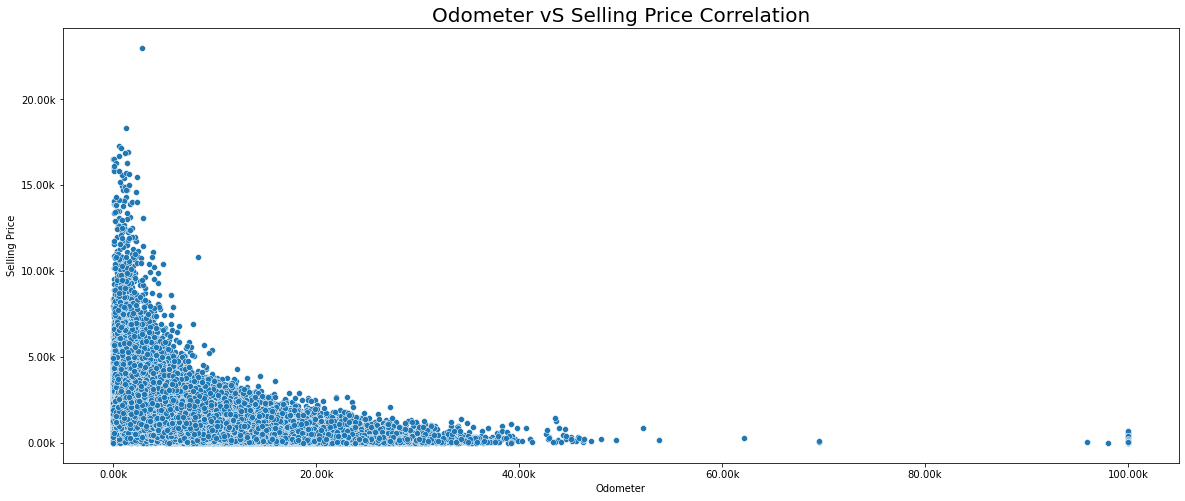

In [18]:
plt.figure(figsize=(20,8))
g=sns.scatterplot(x='Odometer',y='Price',data=df)
g.set_title('Odometer vS Selling Price Correlation',fontsize=20)
g.set_xlabel('Odometer',fontsize=10)
g.set_ylabel('Selling Price',fontsize=10)
xlabels=['{:,.2f}'.format(x)+'k' for x in g.get_xticks()/10e3]
ylabels=['{:,.2f}'.format(y)+'k' for y in g.get_yticks()/10e3]
g.set_xticklabels(xlabels);
g.set_yticklabels(ylabels);

Text(0, 0.5, 'Total Cars')

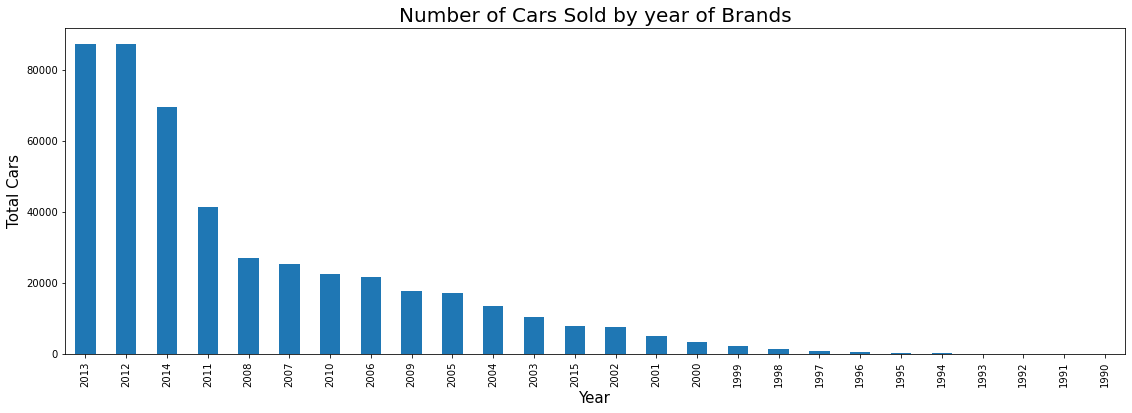

In [20]:
plt.figure(figsize=(19,6))

df['Year'].value_counts().plot(kind='bar')

plt.title('Number of Cars Sold by year of Brands',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Cars',fontsize=15)

Text(0, 0.5, 'Selling Price')

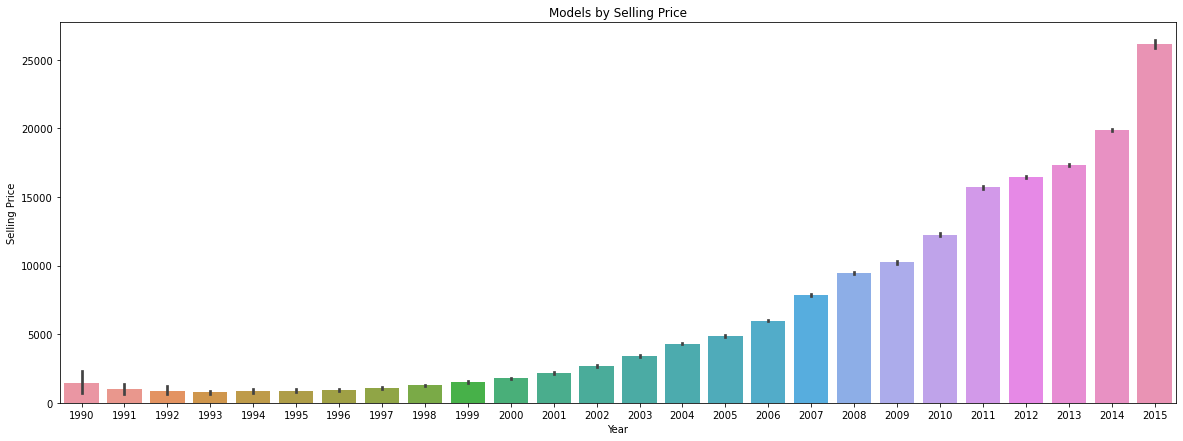

In [19]:
plt.figure(figsize=(20,7))
sns.barplot(x='Year',y='Price',data=df)
plt.title('Models by Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')

# Conclusion

    
    In this notebook, I performed EDA on the Car Auction dataset to understand the factors influencing the Auction of used car's. It was a large dataset containing about 558k rows. I have deleted the null values and irrelevent columns to get better understandings of the data.
    In this analysis, I plotted some graphs to show the distribution of selling price according to different factors like Odometer, Year of the model and the Brands of the vehicle.
    From this analysis, I could understand that, the factors like Odometer(the distance travelled by the vehicle), Brands of vehicle and Year of the model are mainly influencing the auction of used cars. Cars with lesser odometer are getting good selling price in the auction. 